In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
states_daily = pd.read_csv('http://covidtracking.com/api/states/daily.csv')
states_pop = pd.read_csv('./data/states_population.csv')

In [3]:
states_daily.head()

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200328,AK,85.0,2836.0,NaN,5.0,2.0,2921,edb7e6bcde715f8bbea31547e99aa8b4712ea5fb,2020-03-28T20:00:00Z,2921,2,1.0,2.0,517.0,16.0,533.0
1,20200328,AL,696.0,4184.0,NaN,NaN,3.0,4880,c9986a845bd2f8f9c9a4294a8e5d66a01ee6aadf,2020-03-28T20:00:00Z,4880,1,0.0,0.0,0.0,109.0,109.0
2,20200328,AR,404.0,2938.0,0.0,48.0,5.0,3342,47d05acbbf2fbb56ddd9c44c3b9e204d10f050c3,2020-03-28T20:00:00Z,3342,5,2.0,0.0,1393.0,23.0,1416.0
3,20200328,AS,0.0,NaN,0.0,NaN,0.0,0,c6fae61e10e1a1154e848a52a3665304ec76dd53,2020-03-28T20:00:00Z,0,60,0.0,0.0,0.0,0.0,0.0
4,20200328,AZ,873.0,7455.0,21.0,NaN,15.0,8349,9b04c4c073cb904f606bb9efb2ac77c8ecc810cd,2020-03-28T20:00:00Z,8328,4,2.0,0.0,0.0,137.0,137.0


In [4]:
states_pop.head()

,State Name,State_Code,2019 Estimate
0,.Alabama,AL,4903185
1,.Alaska,AK,731545
2,.Arizona,AZ,7278717
3,.Arkansas,AR,3017804
4,.California,CA,39512223


In [5]:
state_pops = (
                states_pop
                .rename(columns={'State_Code': 'Name', '2019 Estimate': 'Pop'})
                .set_index('Name')
                .loc[:, 'Pop'].to_dict()
)

In [15]:
state_pops

{'AL': 4903185,
 'AK': 731545,
 'AZ': 7278717,
 'AR': 3017804,
 'CA': 39512223,
 'CO': 5758736,
 'CT': 3565287,
 'DE': 973764,
 'DC': 705749,
 'FL': 21477737,
 'GA': 10617423,
 'HI': 1415872,
 'ID': 1787065,
 'IL': 12671821,
 'IN': 6732219,
 'IA': 3155070,
 'KS': 2913314,
 'KY': 4467673,
 'LA': 4648794,
 'ME': 1344212,
 'MD': 6045680,
 'MA': 6892503,
 'MI': 9986857,
 'MN': 5639632,
 'MS': 2976149,
 'MO': 6137428,
 'MT': 1068778,
 'NE': 1934408,
 'NV': 3080156,
 'NH': 1359711,
 'NJ': 8882190,
 'NM': 2096829,
 'NY': 19453561,
 'NC': 10488084,
 'ND': 762062,
 'OH': 11689100,
 'OK': 3956971,
 'OR': 4217737,
 'PA': 12801989,
 'RI': 1059361,
 'SC': 5148714,
 'SD': 884659,
 'TN': 6829174,
 'TX': 28995881,
 'UT': 3205958,
 'VT': 623989,
 'VA': 8535519,
 'WA': 7614893,
 'WV': 1792147,
 'WI': 5822434,
 'WY': 578759}

In [6]:
states_daily['date'] = pd.to_datetime(states_daily['date'],format="%Y%m%d")

In [7]:
states_total_by_dates = states_daily.pivot_table(index='date', columns='state', values='totalTestResults')

In [8]:
# Now we need to process the data with test number per millions of people
drop_states = [x for x in states_total_by_dates.columns if x not in list(state_pops.keys())]
states_tests_norm_by_pop = states_total_by_dates.drop(drop_states, axis=1).copy(deep=True)
for state, pop in state_pops.items():
    states_tests_norm_by_pop.loc[:, state] = states_tests_norm_by_pop.loc[:, state] / pop * 1e6


Text(0, 0.5, 'Total Tests Per Million')

<Figure size 720x360 with 0 Axes>

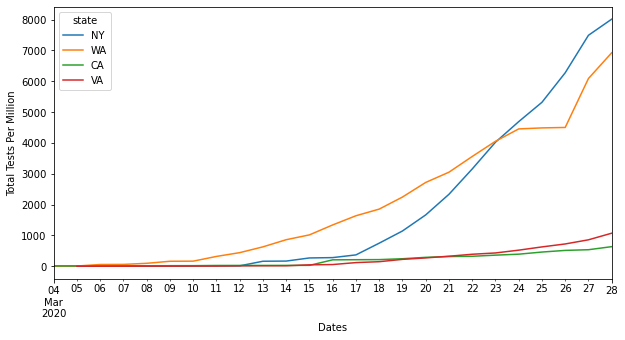

In [9]:
plt.figure(figsize=(10,5))
ax = states_tests_norm_by_pop.loc[:, ['NY', 'WA', 'CA', 'VA']].plot(figsize=(10,5))
ax.set_xlabel('Dates')
ax.set_ylabel('Total Tests Per Million')

Text(0, 0.5, 'Total Tests Per Million')

<Figure size 720x360 with 0 Axes>

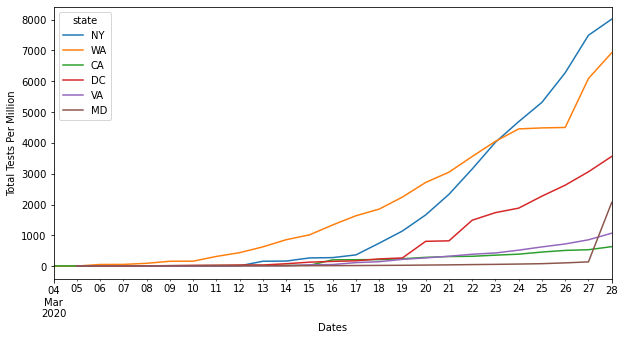

In [10]:
plt.figure(figsize=(10,5))
ax = states_tests_norm_by_pop.loc[:, ['NY', 'WA', 'CA', 'DC', 'VA', 'MD']].plot(figsize=(10,5))
ax.set_xlabel('Dates')
ax.set_ylabel('Total Tests Per Million')

## Plotly Examples

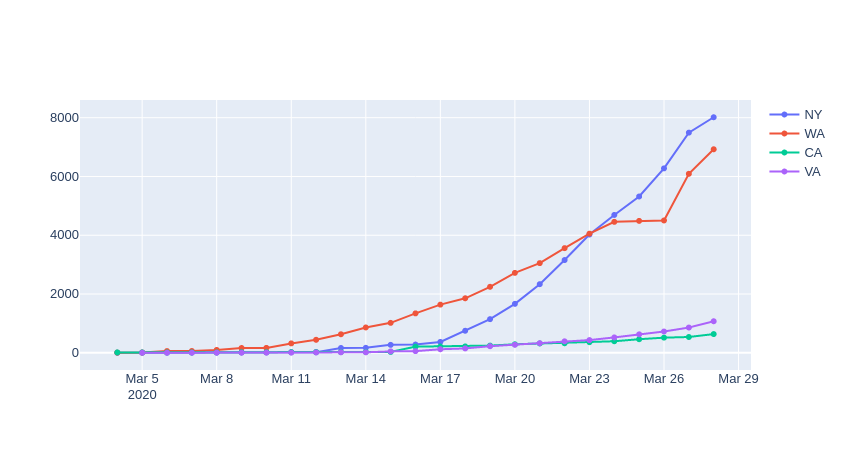

In [14]:
states_included = ['NY', 'WA', 'CA', 'VA']
fig = go.Figure()
for state in states_included:
    fig.add_trace(go.Scatter(x=states_tests_norm_by_pop.index, y=states_tests_norm_by_pop.loc[:, state],
              mode='lines+markers', name=state))
fig.show()

In [18]:
# States list
states_list = []
for state in state_pops.keys():
    states_list.append({'label': state, 'value': state})
states_list

[{'label': 'AL', 'value': 'AL'},
 {'label': 'AK', 'value': 'AK'},
 {'label': 'AZ', 'value': 'AZ'},
 {'label': 'AR', 'value': 'AR'},
 {'label': 'CA', 'value': 'CA'},
 {'label': 'CO', 'value': 'CO'},
 {'label': 'CT', 'value': 'CT'},
 {'label': 'DE', 'value': 'DE'},
 {'label': 'DC', 'value': 'DC'},
 {'label': 'FL', 'value': 'FL'},
 {'label': 'GA', 'value': 'GA'},
 {'label': 'HI', 'value': 'HI'},
 {'label': 'ID', 'value': 'ID'},
 {'label': 'IL', 'value': 'IL'},
 {'label': 'IN', 'value': 'IN'},
 {'label': 'IA', 'value': 'IA'},
 {'label': 'KS', 'value': 'KS'},
 {'label': 'KY', 'value': 'KY'},
 {'label': 'LA', 'value': 'LA'},
 {'label': 'ME', 'value': 'ME'},
 {'label': 'MD', 'value': 'MD'},
 {'label': 'MA', 'value': 'MA'},
 {'label': 'MI', 'value': 'MI'},
 {'label': 'MN', 'value': 'MN'},
 {'label': 'MS', 'value': 'MS'},
 {'label': 'MO', 'value': 'MO'},
 {'label': 'MT', 'value': 'MT'},
 {'label': 'NE', 'value': 'NE'},
 {'label': 'NV', 'value': 'NV'},
 {'label': 'NH', 'value': 'NH'},
 {'label':